### Imbalanced classes - Credit Card Fraud dataset

### Panagiotis Doupidis, DWS 89
[Link to dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) (*downloaded from kaggle*)

In [1]:
!pip install -U imbalanced_learn

     |████████████████████████████████| 199 kB 5.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [2]:
import pandas as pd

In [3]:
# load the csv file

path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv" # loading the file from google drive
# uncomment line below to load the csv from the local copy in the directory
# path = "creditcard.csv"

df = pd.read_csv(path, sep=',')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.Class.value_counts(normalize=True) # 99.82% are legit and 0.172% are fraudulent

0    0.998273
1    0.001727
Name: Class, dtype: float64

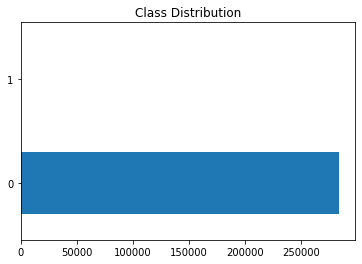

In [ ]:
df.Class.value_counts(normalize=False).plot(kind='barh', title='Class Distribution', width=.6)

#### Scale Time and Amount features

##### Use MinMax scaler to scale the features from 0 to 1 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df[df.columns] = MinMaxScaler().fit_transform(df[df.columns])

# df.drop(columns=['Time', 'Amount'], inplace=True)

In [ ]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

import numpy as np

X, y = df.drop('Class', axis=1), df.Class

np.random.seed(42)

# 70% train, 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, stratify=y)

##### Establish the classifiers that are going to be utilized (RF, Lin. SVM, NB)
 

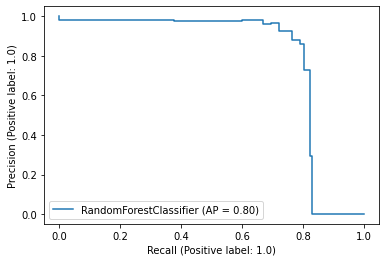

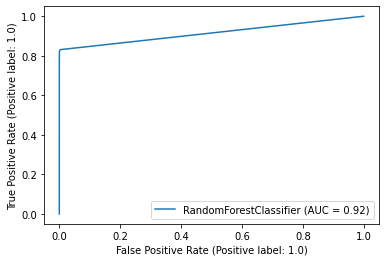

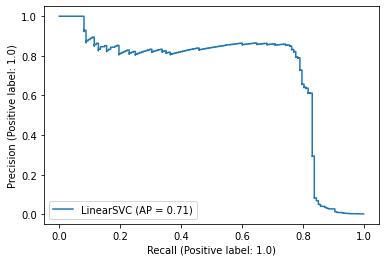

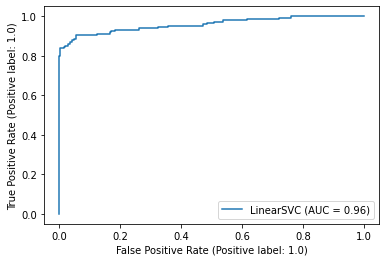

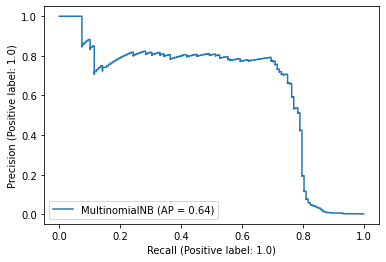

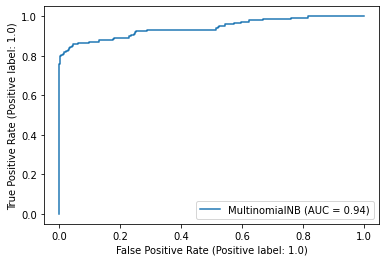

In [ ]:
classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy'), LinearSVC(C=1), MultinomialNB()]

np.random.seed(42)

for clf in classifiers:
    clf.fit(X_train, y_train)
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
    RocCurveDisplay.from_estimator(clf, X_test, y_test)
    

Standard metrics such as precision and recall can be misleading when dealing with a highly imbalanced dataset, so they cannot be safely used during our decision making process. Instead, we are going to make use of two other metrics that fit more on these kind of problems, ROC and (mainly) Precision-Recall curves.

With no manipulation techniques to deal with the imbalance, the metrics are:

*   Random Forest (Precision-Recall = 0.8, ROC = 0.92)
*   Linear SVM (Precision-Recall = 0.71, ROC = 0.96)
*   Naive Bayes (Precision-Recall = 0.64, ROC = 0.94)    

Using the PR curve value as our metric we would pick the Random Forest classifier 

#### Before balancing

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import warnings

warnings.filterwarnings('ignore')

for clf in classifiers:
    pipeline = make_pipeline(clf)
    pipeline.fit(X_train, y_train)
    print(clf.__class__.__name__)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud'), digits=3))
    

RandomForestClassifier
                   pre       rec       spe        f1       geo       iba       sup

      legit      0.999     1.000     0.709     1.000     0.842     0.730     85295
      fraud      0.963     0.709     1.000     0.817     0.842     0.689       148

avg / total      0.999     0.999     0.710     0.999     0.842     0.730     85443

LinearSVC
                   pre       rec       spe        f1       geo       iba       sup

      legit      0.999     1.000     0.561     1.000     0.749     0.585     85295
      fraud      0.856     0.561     1.000     0.678     0.749     0.536       148

avg / total      0.999     0.999     0.562     0.999     0.749     0.585     85443

MultinomialNB
                   pre       rec       spe        f1       geo       iba       sup

      legit      0.998     1.000     0.000     0.999     0.000     0.000     85295
      fraud      0.000     0.000     1.000     0.000     0.000     0.000       148

avg / total      0.997     0.998

As pointed out above, standard measures are not reliable.
Precision and recall and f1 score are nearly 1 but due to the imbalance in our data that means that the models classify most of the legitimate transactions correctly. Because these are also the majority this behaviour is expected although we would like to focus on the positives(fraudulent txs) that are the minority.



---

5-fold cross-validation to reiterate what was mentioned above.

In [ ]:
np.random.seed(42)

for clf in classifiers:
    scores = cross_validate(clf, X, y, cv=5, scoring=['accuracy', 'balanced_accuracy', 'f1'])
    print(clf.__class__.__name__)
    print("-" * 30)
    print("%s: %.4f (+/- %.3f)" % ('Accuracy', scores["test_accuracy"].mean(), scores["test_accuracy"].std()))
    print("%s: %.4f (+/- %.3f)" % ('Balanced Accuracy', scores["test_balanced_accuracy"].mean(), scores["test_balanced_accuracy"].std()))
    print("%s: %.4f (+/- %.3f)" % ('F1 score', scores["test_f1"].mean(), scores["test_f1"].std()))
    print("-" * 30)

RandomForestClassifier
------------------------------
Accuracy: 0.9951 (+/- 0.009)
Balanced Accuracy: 0.8736 (+/- 0.038)
F1 score: 0.6765 (+/- 0.286)
------------------------------
LinearSVC
------------------------------
Accuracy: 0.9991 (+/- 0.000)
Balanced Accuracy: 0.7913 (+/- 0.089)
F1 score: 0.6834 (+/- 0.100)
------------------------------
MultinomialNB
------------------------------
Accuracy: 0.9983 (+/- 0.000)
Balanced Accuracy: 0.5000 (+/- 0.000)
F1 score: 0.0000 (+/- 0.000)
------------------------------


#### Using weights

Our first approach is to use weights. More specifically we are going to weight each example according to the inverse ratio of the frequency of the class they belong to.

In [ ]:
weights = np.zeros_like(y)

# balanced weighting, inversely proportional to the frequencies of the classes
weight_legit, weight_fraud = y.shape[0] / (2 * np.bincount(y))

print('Weight for examples in the majority (legitimate tx) class:', np.round(weight_legit,5))
print('Weight for examples in the minority (fraudulent tx) class:', np.round(weight_fraud,5))

weights[np.where(y == 0)] = weight_legit
weights[np.where(y == 1)] = weight_fraud

Weigth for examples in the majority (legitimate tx) class: 0.50087
Weigth for examples in the minority (fraudulent tx) class: 289.43801


In [ ]:
np.random.seed(42)

for clf in classifiers:
    clf.fit(X, y, sample_weight=weights)
    scores = cross_validate(clf, X, y, cv=5, scoring=['accuracy', 'balanced_accuracy', 'f1'])
    print(clf.__class__.__name__)
    print("-" * 30)
    print("%s: %.4f (+/- %.3f)" % ('Accuracy', scores["test_accuracy"].mean(), scores["test_accuracy"].std()))
    print("%s: %.4f (+/- %.3f)" % ('Balanced Accuracy', scores["test_balanced_accuracy"].mean(), scores["test_balanced_accuracy"].std()))
    print("%s: %.4f (+/- %.3f)" % ('F1 score', scores["test_f1"].mean(), scores["test_f1"].std()))
    print("-" * 30)

RandomForestClassifier
------------------------------
Accuracy: 0.9714 (+/- 0.056)
Balanced Accuracy: 0.8607 (+/- 0.026)
F1 score: 0.6541 (+/- 0.320)
------------------------------
LinearSVC
------------------------------
Accuracy: 0.9991 (+/- 0.000)
Balanced Accuracy: 0.7913 (+/- 0.089)
F1 score: 0.6834 (+/- 0.100)
------------------------------
MultinomialNB
------------------------------
Accuracy: 0.9983 (+/- 0.000)
Balanced Accuracy: 0.5000 (+/- 0.000)
F1 score: 0.0000 (+/- 0.000)
------------------------------


In [ ]:
weights = np.zeros_like(y_train)

# balanced weighting, inversely proportional to the frequencies of the classes
weight_legit, weight_fraud = y_train.shape[0] / (2 * np.bincount(y_train))

print('Weight for examples in the majority (legitimate tx) class:', np.round(weight_legit,5))
print('Weight for examples in the minority (fraudulent tx) class:', np.round(weight_fraud,5))

weights[np.where(y_train == 0)] = weight_legit
weights[np.where(y_train == 1)] = weight_fraud

Weight for examples in the majority (legitimate tx) class: 0.50086
Weight for examples in the minority (fraudulent tx) class: 289.77326


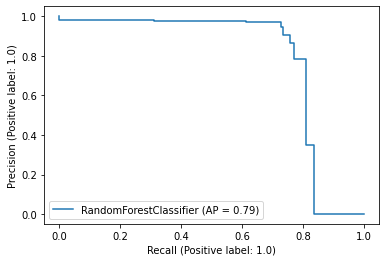

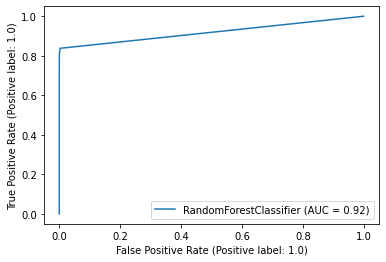

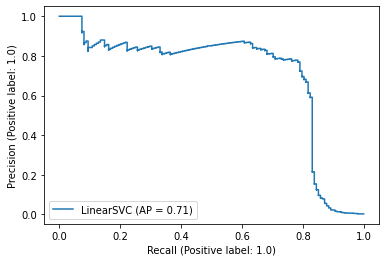

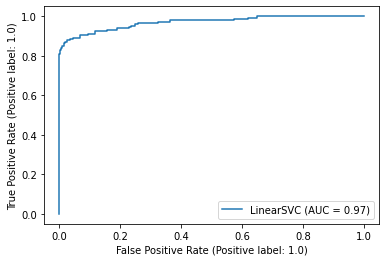

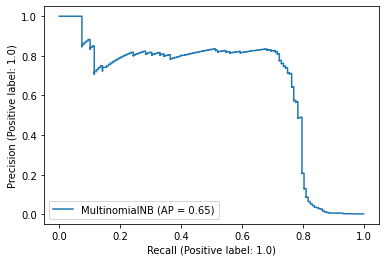

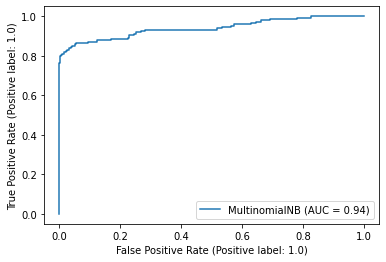

In [ ]:
np.random.seed(42)

for clf in classifiers:
    clf.fit(X_train, y_train, sample_weight=weights)
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
    RocCurveDisplay.from_estimator(clf, X_test, y_test)

After adding weights to deal with the imbalance, the metrics are:

*   Random Forest (Precision-Recall = 0.79, ROC = 0.92)
*   Linear SVM (Precision-Recall = 0.71, ROC = 0.97)
*   Naive Bayes (Precision-Recall = 0.65, ROC = 0.94)    

Using the PR curve value as our metric we would pick the Random Forest classifier 

#### Easy Ensemble

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

np.random.seed(42)

scores = cross_validate(EasyEnsembleClassifier(n_estimators=20, replacement=True), X, y, cv=5, scoring=['accuracy', 'balanced_accuracy', 'f1'])
print('Enseble Classifier')
print("-" * 30)
print("%s: %.4f (+/- %.3f)" % ('Accuracy', scores["test_accuracy"].mean(), scores["test_accuracy"].std()))
print("%s: %.4f (+/- %.3f)" % ('Balanced Accuracy', scores["test_balanced_accuracy"].mean(), scores["test_balanced_accuracy"].std()))
print("%s: %.4f (+/- %.3f)" % ('F1 score', scores["test_f1"].mean(), scores["test_f1"].std()))
print("-" * 30)

Enseble Classifier
------------------------------
Accuracy: 0.8030 (+/- 0.326)
Balanced Accuracy: 0.8576 (+/- 0.141)
F1 score: 0.0911 (+/- 0.079)
------------------------------


Accuracy has dropped to 0.8 but balanced accuracy has actually increased which might indicate that some of the positives are being picked up by the model

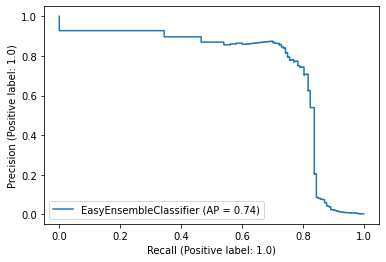

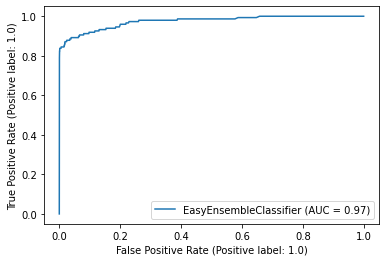

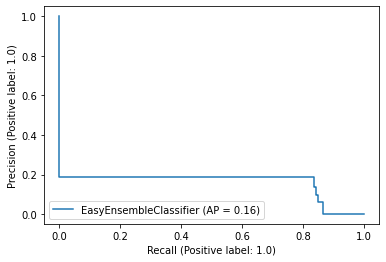

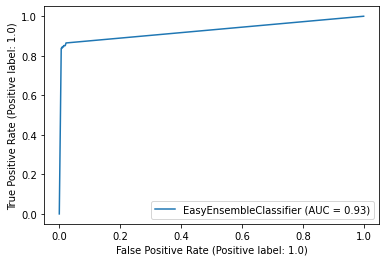

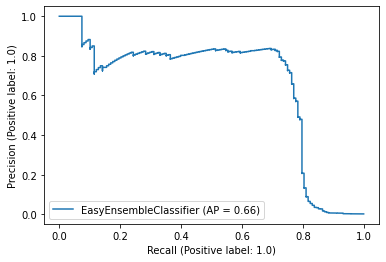

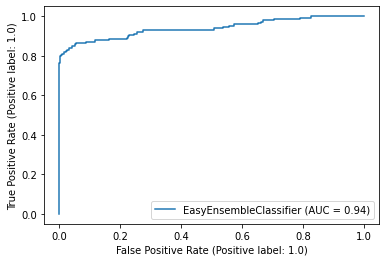

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
np.random.seed(42)

for clf in classifiers:
    ee = EasyEnsembleClassifier(n_estimators=50, base_estimator=clf, replacement=True)
    ee.fit(X_train, y_train)
    PrecisionRecallDisplay.from_estimator(ee, X_test, y_test)
    RocCurveDisplay.from_estimator(ee, X_test, y_test)

*   Random Forest (Precision-Recall = 0.74, ROC = 0.97)
*   Linear SVM (Precision-Recall = 0.16 ROC = 0.93)
*   Naive Bayes (Precision-Recall = 0.66, ROC = 0.94)    

Using the PR curve value as our metric we would pick the Random Forest classifier. In this case we can detect an increase of the average precision using the PR curve with regards to the naive Bayes classifier. This technique has really negatively impacted the average precision of the linear SVM to 0.16. After taking a closer look in the actual curve it is apparent that for threshold levels up to 0.8 the precision is virtually constant. 

### Near Miss

#### NearMiss-1 : Select majority class examples with the smallest average distance to the three closest minority class examples

NearMiss(1) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.62      0.93      0.76      0.75      0.55     85295
      fraud       0.00      0.93      0.62      0.01      0.75      0.59       148

avg / total       1.00      0.62      0.93      0.76      0.75      0.55     85443

--------------------------------------------------
NearMiss(1) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.93      0.84      0.96      0.89      0.79     85295
      fraud       0.02      0.84      0.93      0.04      0.89      0.78       148

avg / total       1.00      0.93      0.84      0.96      0.89      0.79     85443

--------------------------------------------------
NearMiss(1) + MultinomialNB
-------------------------------------

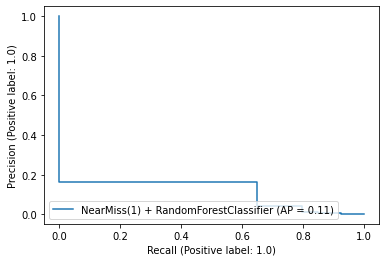

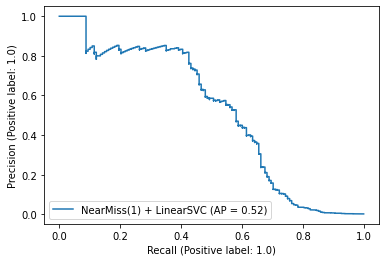

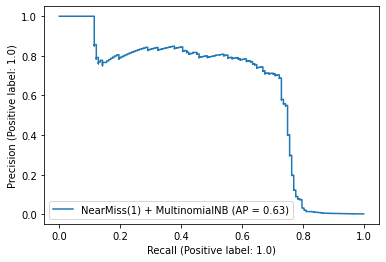

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy'), LinearSVC(C=1), MultinomialNB()]

for clf in classifiers:
    pipeline = make_pipeline(NearMiss(version=1), clf)
    pipeline.fit(X_train, y_train)
    print("NearMiss(1) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="NearMiss(1) + " + clf.__class__.__name__)

*   Random Forest (Precision-Recall = 0.11)
*   Linear SVM (Precision-Recall = 0.52)
*   Naive Bayes (Precision-Recall = 0.63)    

Using the PR curve value as our metric we would pick the naive Bayes classifier.
The Random Forest classifier seems like is not suited for this method since it outputs a very low average precision score of just 0.11. Looking at the classification report for this classifier we can see that the precision score for the positive class (fraud) is 0.00, meaning a high false positive rate. This also explains the high recall, since it tends to push the examples to the positive (fraud) class which indicated a low false negative rate. Linear SVM and naive Bayes perform better in terms of average precision in the PR curve. 



---



---


We are going to set the max depth of the trees to a lower height (i.e. 2-3) in the Random Forest classifier to see if we can spot any difference in the PR curve. 

NearMiss(1) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.93      0.83      0.96      0.88      0.78     85295
      fraud       0.02      0.83      0.93      0.04      0.88      0.76       148

avg / total       1.00      0.93      0.83      0.96      0.88      0.78     85443

--------------------------------------------------
NearMiss(1) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.93      0.84      0.96      0.89      0.79     85295
      fraud       0.02      0.84      0.93      0.04      0.89      0.78       148

avg / total       1.00      0.93      0.84      0.96      0.89      0.79     85443

--------------------------------------------------
NearMiss(1) + MultinomialNB
-------------------------------------

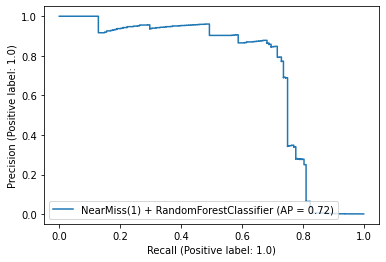

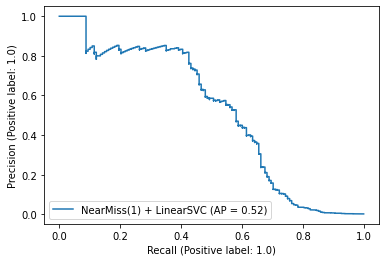

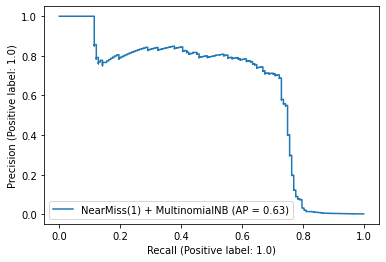

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy',max_depth=2), 
               LinearSVC(C=1), MultinomialNB()]

for clf in classifiers:
    pipeline = make_pipeline(NearMiss(version=1), clf)
    pipeline.fit(X_train, y_train)
    print("NearMiss(1) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="NearMiss(1) + " + clf.__class__.__name__)

*   Random Forest (Precision-Recall = 0.72)
*   Linear SVM (Precision-Recall = 0.52)
*   Naive Bayes (Precision-Recall = 0.63)    

We can clearly see a massive difference by changing this parameter, now the Random Forest classifier has the largest average precision.

#### NearMiss-2 : Select majority class examples with the smallest average distance to the three farthest minority class examples

NearMiss(2) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.97      0.85      0.98      0.91      0.83     85295
      fraud       0.04      0.85      0.97      0.08      0.91      0.81       148

avg / total       1.00      0.97      0.85      0.98      0.91      0.83     85443

--------------------------------------------------
NearMiss(2) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.62      0.83      0.77      0.72      0.51     85295
      fraud       0.00      0.83      0.62      0.01      0.72      0.53       148

avg / total       1.00      0.62      0.83      0.77      0.72      0.51     85443

--------------------------------------------------
NearMiss(2) + MultinomialNB
-------------------------------------

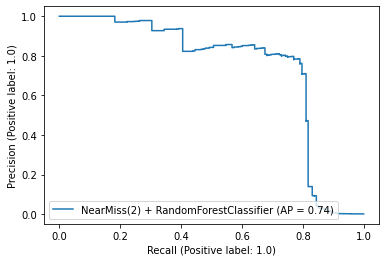

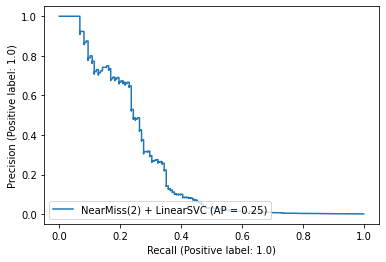

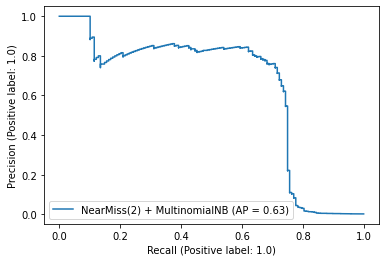

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2), LinearSVC(C=1), MultinomialNB()]


for clf in classifiers:
    pipeline = make_pipeline(NearMiss(version=2), clf)
    pipeline.fit(X_train, y_train)
    print("NearMiss(2) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="NearMiss(2) + " + clf.__class__.__name__) 

*   Random Forest (Precision-Recall = 0.74)
*   Linear SVM (Precision-Recall = 0.25)
*   Naive Bayes (Precision-Recall = 0.63)    

Using the PR curve value as our metric we would pick the Random Forest classifier.
The Linear SVM displays really poor performace here so we'll try to adjust the regularization parameter to a smaller value (0.1)

NearMiss(2) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.97      0.85      0.98      0.91      0.83     85295
      fraud       0.04      0.85      0.97      0.08      0.91      0.81       148

avg / total       1.00      0.97      0.85      0.98      0.91      0.83     85443

--------------------------------------------------
NearMiss(2) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.81      0.76      0.90      0.79      0.62     85295
      fraud       0.01      0.76      0.81      0.01      0.79      0.62       148

avg / total       1.00      0.81      0.76      0.89      0.79      0.62     85443

--------------------------------------------------
NearMiss(2) + MultinomialNB
-------------------------------------

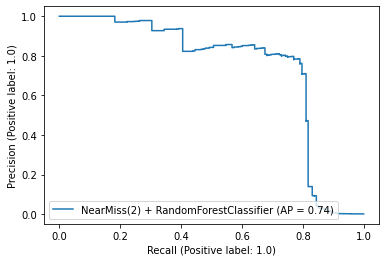

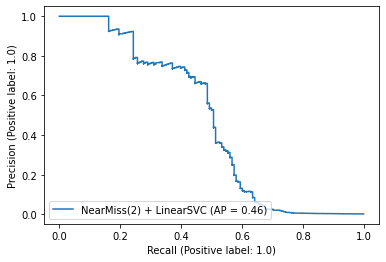

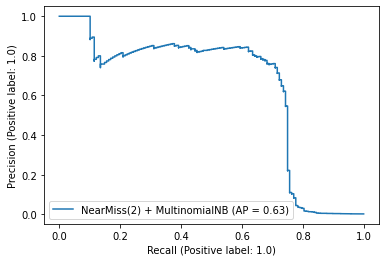

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2), 
               LinearSVC(C=0.1), MultinomialNB()]


for clf in classifiers:
    pipeline = make_pipeline(NearMiss(version=2), clf)
    pipeline.fit(X_train, y_train)
    print("NearMiss(2) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="NearMiss(2) + " + clf.__class__.__name__) 

*   Random Forest (Precision-Recall = 0.74)
*   Linear SVM (Precision-Recall = 0.46)
*   Naive Bayes (Precision-Recall = 0.63)    

We see an increase in the average precision but the SVM is clearly still behind the other 2 models.

#### NearMiss-3: Select the 𝑘 nearest majority class examples for each minority class example (k=3)

NearMiss(3) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      1.00      0.78      1.00      0.88      0.79     85295
      fraud       0.42      0.78      1.00      0.54      0.88      0.76       148

avg / total       1.00      1.00      0.78      1.00      0.88      0.79     85443

--------------------------------------------------
NearMiss(3) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      1.00      0.72      1.00      0.85      0.74     85295
      fraud       0.83      0.72      1.00      0.77      0.85      0.70       148

avg / total       1.00      1.00      0.72      1.00      0.85      0.74     85443

--------------------------------------------------
NearMiss(3) + MultinomialNB
-------------------------------------

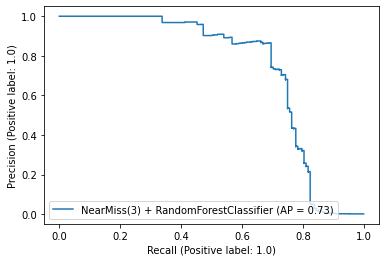

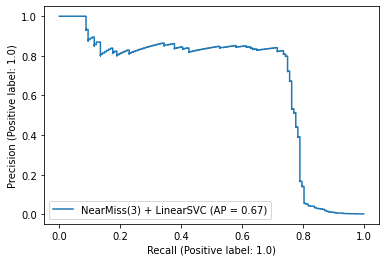

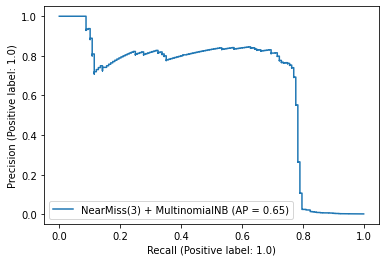

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2), 
               LinearSVC(C=0.1), MultinomialNB()]
               

for clf in classifiers:
    pipeline = make_pipeline(NearMiss(version=3, n_neighbors_ver3=3), clf)
    pipeline.fit(X_train, y_train)
    print("NearMiss(3) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, pipeline.predict(X_test), target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="NearMiss(3) + " + clf.__class__.__name__)

*   Random Forest (Precision-Recall = 0.73)
*   Linear SVM (Precision-Recall = 0.67)
*   Naive Bayes (Precision-Recall = 0.65)    

The Random Forest classifier has the highest average precision from the PR curve followed by the SVM and NB. This variation of Near Miss seems to produce better results in general especially when it comes to the precision of the positive (fraud) class in the RF and SVM models. 

#### SMOTE

SMOTE(5) + RandomForestClassifier
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      1.00      0.82      1.00      0.90      0.83     85295
      fraud       0.87      0.82      1.00      0.84      0.90      0.80       148

avg / total       1.00      1.00      0.82      1.00      0.90      0.83     85443

--------------------------------------------------
SMOTE(5) + LinearSVC
--------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

      legit       1.00      0.98      0.86      0.99      0.92      0.86     85295
      fraud       0.07      0.86      0.98      0.14      0.92      0.84       148

avg / total       1.00      0.98      0.87      0.99      0.92      0.86     85443

--------------------------------------------------
SMOTE(5) + MultinomialNB
----------------------------------------------

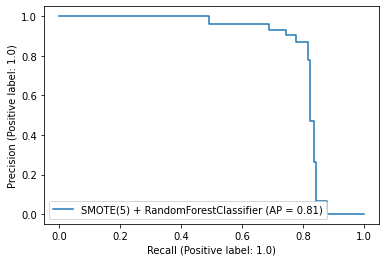

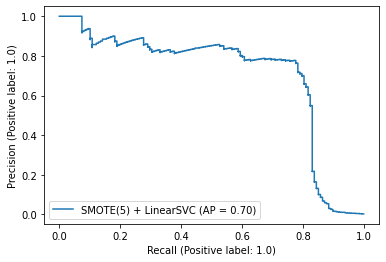

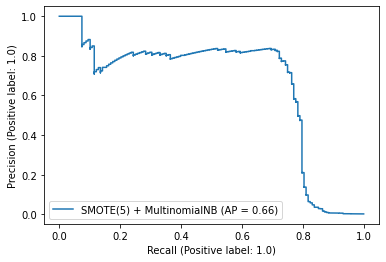

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

np.random.seed(42)

classifiers = [RandomForestClassifier(n_estimators=10, criterion='entropy'), 
               LinearSVC(C=1), MultinomialNB()]

for clf in classifiers:
    pipeline = make_pipeline(SMOTE(k_neighbors=5), clf)
    pipeline.fit(X_train, y_train) 
    y_pred = pipeline.predict(X_test)   
    print("SMOTE(5) + " + clf.__class__.__name__)
    print("-" * 50)
    print(classification_report_imbalanced(y_test, y_pred, target_names=('legit', 'fraud')))
    print("-" * 50)
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name="SMOTE(5) + " + clf.__class__.__name__)


*   Random Forest (Precision-Recall = 0.81)
*   Linear SVM (Precision-Recall = 0.7)
*   Naive Bayes (Precision-Recall = 0.66)    


Using SMOTE outputs some of the best results we've seen so far in terms of average precisions in the PR curves. Here, the Random forest classifier outperforms the rest with an average precision of 0.81. Also from the classification report we can see the high precision and recall achived by Random Forest (0.87 and 0.82 respectively). Overall SMOTE appears to perform better than the other 2 methods examined based on average precision scores from the Precision-Recall curves.